***************************************************
** example7-Bin1(5x5x5, max_weight:100) vol(125) **
***************************************************
FITTED ITEMS:
***************************************************
partno :  Box-18
color :  brown
position :  [Decimal('0'), Decimal('0'), Decimal('0')]
rotation type :  0
W*H*D :  5 * 4 * 2
volume :  40.0
weight :  1.0
***************************************************
partno :  Box-1
color :  yellow
position :  [Decimal('0'), Decimal('4'), Decimal('0')]
rotation type :  2
W*H*D :  5 * 4 * 1
volume :  20.0
weight :  1.0
***************************************************
partno :  Box-12
color :  pink
position :  [Decimal('0'), Decimal('0'), Decimal('2')]
rotation type :  0
W*H*D :  5 * 4 * 1
volume :  20.0
weight :  1.0
***************************************************
partno :  Box-2
color :  olive
position :  [Decimal('0'), Decimal('0'), Decimal('3')]
rotation type :  2
W*H*D :  1 * 2 * 4
volume :  8.0
weight :  1.0
*********

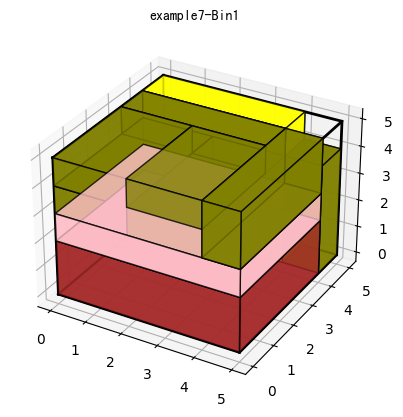

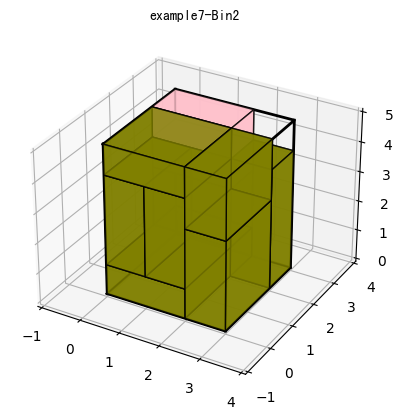

In [30]:
from py3dbp import Packer, Bin, Item, Painter
import time
start = time.time()

'''

If you have multiple boxes, you can change distribute_items to achieve different packaging purposes.
1. distribute_items=True , put the items into the box in order, if the box is full, the remaining items will continue to be loaded into the next box until all the boxes are full  or all the items are packed.
2. distribute_items=False, compare the packaging of all boxes, that is to say, each box packs all items, not the remaining items.

'''

# init packing function
packer = Packer()
#  init bin 
box = Bin('example7-Bin1', (5, 5, 5), 100,0,0)
box2 = Bin('example7-Bin2', (3, 3, 5), 100,0,0)
#  add item
# Item('item partno', (W,H,D), Weight, Packing Priority level, load bear, Upside down or not , 'item color')
packer.addBin(box)
packer.addBin(box2)

packer.addItem(Item(partno='Box-1', name='test1', typeof='cube', WHD=(5, 4, 1), weight=1, level=1,loadbear=100, updown=True, color='yellow'))
packer.addItem(Item(partno='Box-2', name='test2', typeof='cube', WHD=(1, 2, 4), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-3', name='test3', typeof='cube', WHD=(1, 2, 3), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-4', name='test4', typeof='cube', WHD=(1, 2, 2), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-5', name='test5', typeof='cube', WHD=(1, 2, 3), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-6', name='test6', typeof='cube', WHD=(1, 2, 4), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-7', name='test7', typeof='cube', WHD=(1, 2, 2), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-8', name='test8', typeof='cube', WHD=(1, 2, 3), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-9', name='test9', typeof='cube', WHD=(1, 2, 4), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-10', name='test10', typeof='cube', WHD=(1, 2, 3), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-11', name='test11', typeof='cube', WHD=(1, 2, 2), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-12', name='test12', typeof='cube', WHD=(5, 4, 1), weight=1, level=1,loadbear=100, updown=True, color='pink'))
packer.addItem(Item(partno='Box-13', name='test13', typeof='cube', WHD=(1, 1, 4), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-14', name='test14', typeof='cube', WHD=(1, 2, 1), weight=1, level=1,loadbear=100, updown=True, color='pink'))
packer.addItem(Item(partno='Box-15', name='test15', typeof='cube', WHD=(1, 2, 1), weight=1, level=1,loadbear=100, updown=True, color='pink'))
packer.addItem(Item(partno='Box-16', name='test16', typeof='cube', WHD=(1, 1, 4), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-17', name='test17', typeof='cube', WHD=(1, 1, 4), weight=1, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-18', name='test18', typeof='cube', WHD=(5, 4, 2), weight=1, level=1,loadbear=100, updown=True, color='brown'))

# calculate packing 
packer.pack(
    bigger_first=True,
    # Change distribute_items=False to compare the packing situation in multiple boxes of different capacities.
    distribute_items=False,
    fix_point=True,
    check_stable=True,
    support_surface_ratio=0.75,
    number_of_decimals=0
)

# put order
packer.putOrder()

# print result
print("***************************************************")
for idx,b in enumerate(packer.bins) :
    print("**", b.string(), "**")
    print("***************************************************")
    print("FITTED ITEMS:")
    print("***************************************************")
    volume = b.width * b.height * b.depth
    volume_t = 0
    volume_f = 0
    unfitted_name = ''
    for item in b.items:
        print("partno : ",item.partno)
        print("color : ",item.color)
        print("position : ",item.position)
        print("rotation type : ",item.rotation_type)
        print("W*H*D : ",str(item.width) +' * '+ str(item.height) +' * '+ str(item.depth))
        print("volume : ",float(item.width) * float(item.height) * float(item.depth))
        print("weight : ",float(item.weight))
        volume_t += float(item.width) * float(item.height) * float(item.depth)
        print("***************************************************")
    
    print('space utilization : {}%'.format(round(volume_t / float(volume) * 100 ,2)))
    print('residual volumn : ', float(volume) - volume_t )
    print("gravity distribution : ",b.gravity)
    print("***************************************************")
    # draw results
    painter = Painter(b)
    fig = painter.plotBoxAndItems(
        title=b.partno,
        alpha=0.8,
        write_num=False,
        fontsize=10
    )

print("***************************************************")
print("UNFITTED ITEMS:")
for item in packer.unfit_items:
    print("***************************************************")
    print('name : ',item.name)
    print("partno : ",item.partno)
    print("color : ",item.color)
    print("W*H*D : ",str(item.width) +' * '+ str(item.height) +' * '+ str(item.depth))
    print("volume : ",float(item.width) * float(item.height) * float(item.depth))
    print("weight : ",float(item.weight))
    volume_f += float(item.width) * float(item.height) * float(item.depth)
    unfitted_name += '{},'.format(item.partno)
    print("***************************************************")
print("***************************************************")
print('unpack item : ',unfitted_name)
print('unpack item volumn : ',volume_f)

stop = time.time()
print('used time : ',stop - start)

fig.show()

In [4]:
packer = Packer()
packer.addBin(Bin('Bin-1', (5,5,5), 50, 0, 0))
packer.addItem(Item(partno='Box-1', name='test1', typeof='cube', WHD=(5, 4, 1), weight=9, level=1,loadbear=100, updown=True, color='yellow'))
packer.addItem(Item(partno='Box-2', name='test2', typeof='cube', WHD=(1, 2, 4), weight=12, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-3', name='test3', typeof='cube', WHD=(1, 2, 3), weight=11, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-4', name='test4', typeof='cube', WHD=(1, 2, 2), weight=8, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-5', name='test5', typeof='cube', WHD=(1, 2, 3), weight=15, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-6', name='test6', typeof='cube', WHD=(1, 2, 4), weight=13, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-7', name='test7', typeof='cube', WHD=(1, 2, 2), weight=18, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-8', name='test8', typeof='cube', WHD=(1, 2, 3), weight=12, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-9', name='test9', typeof='cube', WHD=(1, 2, 4), weight=8, level=1,loadbear=100, updown=True, color='olive'))
packer.addItem(Item(partno='Box-10', name='test10', typeof='cube', WHD=(1, 2, 3), weight=19, level=1,loadbear=100, updown=True, color='olive'))

In [5]:
packer.pack(
            bigger_first=True,
            distribute_items=True,
            fix_point=True,
            check_stable=True,
            support_surface_ratio=0.75,
            number_of_decimals=0
        )

箱子 Bin-1(5x5x5, max_weight:50) vol(125):
  - Box-1(5x4x1, weight: 9) pos([Decimal('0'), Decimal('0'), Decimal('0')]) rt(0) vol(20) 位置: [Decimal('0'), Decimal('0'), Decimal('0')]
  - Box-2(1x2x4, weight: 12) pos([Decimal('0'), Decimal('4'), Decimal('0')]) rt(1) vol(8) 位置: [Decimal('0'), Decimal('4'), Decimal('0')]
  - Box-6(1x2x4, weight: 13) pos([Decimal('2'), Decimal('4'), Decimal('0')]) rt(1) vol(8) 位置: [Decimal('2'), Decimal('4'), Decimal('0')]
  - Box-9(1x2x4, weight: 8) pos([Decimal('0'), Decimal('0'), Decimal('1')]) rt(0) vol(8) 位置: [Decimal('0'), Decimal('0'), Decimal('1')]
  - Box-4(1x2x2, weight: 8) pos([Decimal('1'), Decimal('0'), Decimal('1')]) rt(0) vol(4) 位置: [Decimal('1'), Decimal('0'), Decimal('1')]



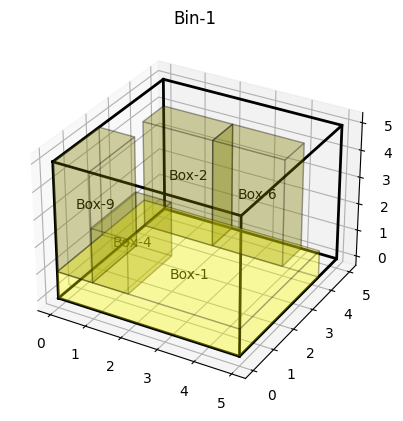

In [8]:
packer.putOrder()
# 輸出結果
for idx,b in enumerate(packer.bins):
    print(f"箱子 {b.string()}:")
    for item in b.items:
        print(f"  - {item.string()} 位置: {item.position}")
    print("")
    # 輸出圖例
    painter = Painter(b)
    fig = painter.plotBoxAndItems(
        title=b.partno,
        alpha=0.2,
        write_num=True,
        fontsize=10
    )
fig.show()

In [58]:
for b in packer.bins:
    print(b.string())

Bin-1(5x5x5, max_weight:50) vol(125)
Bin-2(5x5x5, max_weight:50) vol(125)
Bin-2(5x5x5, max_weight:50) vol(125)
Bin-2(5x5x5, max_weight:50) vol(125)


In [9]:
packer.bins

[<py3dbp.main.Bin at 0x27f8b486a08>, <py3dbp.main.Bin at 0x27ff317fc48>]

In [6]:
packer.unfit_items

In [9]:
unfit_items = [(item.name, item.width, item.height, item.depth, item.weight) for item in packer.unfit_items]

[('test3', Decimal('1'), Decimal('2'), Decimal('3'), Decimal('11')),
 ('test5', Decimal('1'), Decimal('2'), Decimal('3'), Decimal('15')),
 ('test8', Decimal('1'), Decimal('2'), Decimal('3'), Decimal('12')),
 ('test10', Decimal('1'), Decimal('2'), Decimal('3'), Decimal('19')),
 ('test7', Decimal('1'), Decimal('2'), Decimal('2'), Decimal('18'))]

箱子-1(10x10x10, max_weight:50) vol(1000):
  - Box-1(5x5x5, weight: 10) pos([Decimal('0'), Decimal('0'), Decimal('0')]) rt(0) vol(125) 位置: [Decimal('0'), Decimal('0'), Decimal('0')]
  - Box-2(4x4x4, weight: 8) pos([Decimal('5'), Decimal('0'), Decimal('0')]) rt(0) vol(64) 位置: [Decimal('5'), Decimal('0'), Decimal('0')]
  - Box-5(10x2x3, weight: 15) pos([Decimal('0'), Decimal('5'), Decimal('0')]) rt(0) vol(60) 位置: [Decimal('0'), Decimal('5'), Decimal('0')]
  - Box-6(5x4x3, weight: 5) pos([Decimal('0'), Decimal('7'), Decimal('0')]) rt(2) vol(60) 位置: [Decimal('0'), Decimal('7'), Decimal('0')]
  - Box-3(3x3x3, weight: 6) pos([Decimal('4'), Decimal('7'), Decimal('0')]) rt(0) vol(27) 位置: [Decimal('4'), Decimal('7'), Decimal('0')]

箱子-2(10x10x10, max_weight:50) vol(1000):
  - Box-4(5x4x1, weight: 25) pos([Decimal('0'), Decimal('0'), Decimal('0')]) rt(2) vol(20) 位置: [Decimal('0'), Decimal('0'), Decimal('0')]
  - Box-7(8x1x2, weight: 9) pos([Decimal('4'), Decimal('0'), Decimal('0')]) rt(1) vol(16) 

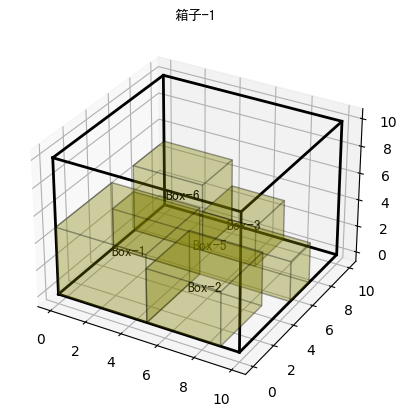

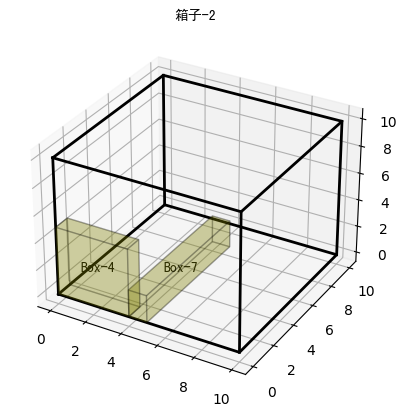

In [26]:
from py3dbp import Packer, Bin, Item, Painter

def auto_pack_items(items):
    """
    自動裝箱函數
    :param items: 用戶自行輸入尺寸表，包含長寬高與重量
    :return: 裝箱後結果
    """
    # 箱子尺寸與承重
    bin_length, bin_width, bin_height, bin_weight_limit = 10, 10, 10, 50
    # 初始化未裝箱的貨品
    unfit_items = items[:]
    bin_count = 0
    # 若有未裝箱，則新增一個箱子
    while unfit_items:
        # 建立Packer
        packer = Packer()
        # 新增箱子
        bin_count += 1
        for count in range(1, bin_count+1):
            new_bin = Bin(f'箱子-{count}', (bin_length, bin_width, bin_height), bin_weight_limit, 0, 0)
            packer.addBin(new_bin)
        # 嘗試裝箱
        for idx, (item_name,item_length, item_width, item_height, item_weight) in enumerate(items):
            packer.addItem(Item(partno=f'Box-{idx+1}', name=item_name, typeof='cube', WHD=(item_length, item_width, item_height), weight=item_weight,
                                level=1, loadbear=100, updown=True, color='olive'))
        # 執行裝箱演算法
        packer.pack(
            bigger_first=True,
            distribute_items=True,
            fix_point=True,
            check_stable=True,
            support_surface_ratio=0.75,
            number_of_decimals=0
        )
        # 更新未裝箱的物品
        unfit_items = [(item.name, item.width, item.height, item.depth, item.weight) for item in packer.unfit_items]
    
    figure = []
    for idx,b in enumerate(packer.bins):
        print(f"{b.string()}:")
        for item in b.items:
            print(f"  - {item.string()} 位置: {item.position}")
        print("")
        # 輸出圖例
        painter = Painter(b)
        fig = painter.plotBoxAndItems(
            title=b.partno,
            alpha=0.2,
            write_num=True,
            fontsize=10
        )
        figure.append(fig)

    return figure

# 自行輸入尺寸與重量
user_items = [
    ('box1', 5, 5, 5, 10),
    ('box2', 4, 4, 4, 8),
    ('box3', 3, 3, 3, 6),
    ('box4', 5, 4, 1, 25),
    ('box5', 10, 2, 3, 15),
    ('box6', 5, 4, 3, 5),
    ('box7', 8, 1, 2, 9)
]

# 使用自動裝箱函數
fig = auto_pack_items(user_items)

In [29]:
fig[0].show()

In [8]:
import streamlit as st
cols = st.columns(10)

In [10]:
cols[0]

DeltaGenerator()

In [12]:
item_list=[1,2,3,4,5,6]
items = [True,True,True,False,True,True]
item_list[items]

TypeError: list indices must be integers or slices, not list

In [13]:
[item for item, include in zip(item_list, items) if include]

[1, 2, 3, 5, 6]